In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_parquet(r'data\clean\cleaned_data.parquet')
print('\n', df.dtypes)


 auction_id     string[python]
experiment     string[python]
date           datetime64[ns]
hour                    int64
device_make    string[python]
platform_os             int64
browser        string[python]
yes                     int64
no                      int64
dtype: object


In [28]:
print(df.groupby('experiment').size())

experiment
control    4071
exposed    4006
dtype: int64


In [29]:
percent_control = df[df['experiment'] == 'control'].shape[0]/df['experiment'].shape[0] * 100
percent_exposed = df[df['experiment']== 'exposed'].shape[0]/df['experiment'].shape[0]*100

print(f'Percentage of control group: {percent_control:.2f}%')
print(f'Percentage of exposed group: {percent_exposed:.2f}%')

Percentage of control group: 50.40%
Percentage of exposed group: 49.60%


In [ ]:
df['responded'] = df[['yes', 'no']].sum(axis=1)
df['responded'] = df['responded'].apply(lambda x: 1 if x >=  1 else 0)
responded_conversion = df.groupby('experiment')['responded'].mean()*100
print('Conversion rate by expriment group (users selected yes or no):')
print(responded_conversion)
#Taxa de conversão é um pouco baixa. Porem, considerado que esta sendo feito um teste A/B, a taxa de conversão do grupo exposto é maior do que o controle

df['not_responded'] = df['responded'].apply(lambda x: 1 if x == 0 else 0)
not_responded_conversion = df.groupby('experiment')['not_responded'].mean()*100
print('\nUsers that did not respond to the survey:')
print(not_responded_conversion)
# A maior parte dos usuarios preferiu nao responder o questionário, confirmando a taxa de conversão baixa

yes_conversion = df.groupby('experiment')['yes'].mean()*100
print('\nUsers that respondend and selected yes:')
print(yes_conversion)
# Há um aumento nas respostas afirmativas no grupo exposto, um pouco mais de 1%

no_conversion = df.groupby('experiment')['no'].mean()*100
print('\nUsers that responded and selected no:')
print(no_conversion)
# Há, tambem, um número maior de respotas negativas no grupo exposto, no entanto, é um pouco menos de 1%

Conversion rate by expriment group (users selected yes or no):
experiment
control    14.394498
exposed    16.400399
Name: responded, dtype: float64

Users that did not respond to the survey:
experiment
control    85.605502
exposed    83.599601
Name: not_responded, dtype: float64

Users that respondend and selected yes:
experiment
control    6.484893
exposed    7.688467
Name: yes, dtype: float64

Users that responded and selected no:
experiment
control    7.909605
exposed    8.711932
Name: no, dtype: float64


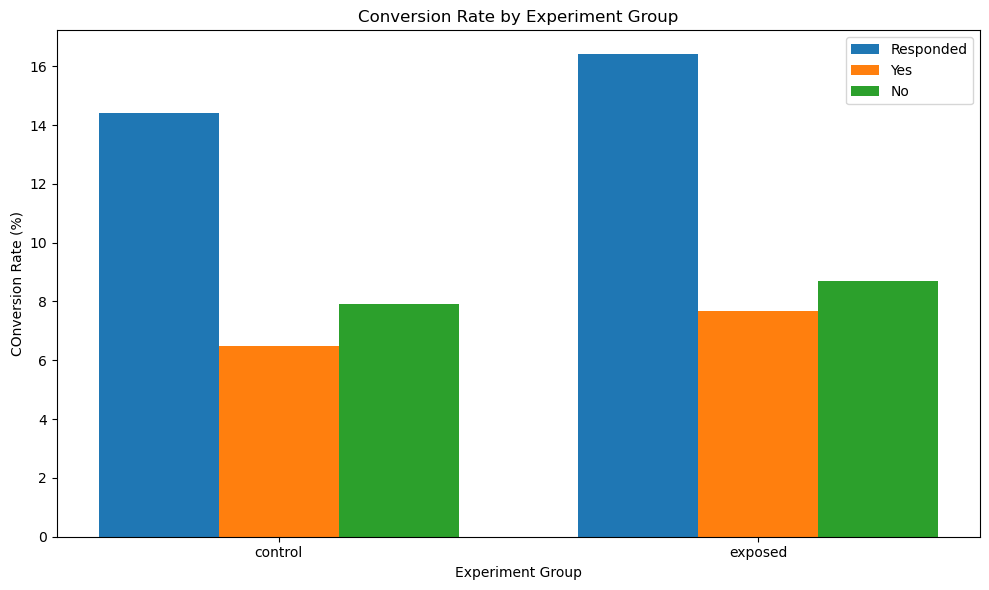

In [41]:
groups = ['control', 'exposed']

total_rate = [responded_conversion.loc[group] for group in groups]
yes_rate = [yes_conversion.loc[group] for group in groups]
no_rate = [no_conversion.loc[group] for group in groups]

x = np.arange(len(groups))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x-width, total_rate, width, label= 'Responded')
ax.bar(x, yes_rate, width, label= 'Yes')
ax.bar(x+width, no_rate, width, label= 'No')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('COnversion Rate (%)')
ax.set_xlabel('Experiment Group')
ax.set_title('Conversion Rate by Experiment Group')
ax.legend()
plt.tight_layout()
plt.show()